<a href="https://colab.research.google.com/github/Aaaron1995/class20221017/blob/main/class1017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


可支援\
## markdown語法
* 範例一
- 範例二
  > 放引言
  >> 放引言中的引言

---

# LaTeX Math 語法

$ Area = \frac{1}{2} \pi r^2 \\
=2 \int^{r}_{-r} \sqrt{r^2-x^2} dx$

反正就是要放在$$之間\
特殊符號與運算子前面要加\\



In [ ]:
!pip install scikit-learn

In [36]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
db = pd.DataFrame(iris["data"], columns = iris["feature_names"])#讀取資料為表格
db["ans"] = iris["target"]
db

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [73]:
import numpy as np
from sklearn.model_selection import train_test_split

# drop為panda中的語法，可以對欄位進行切割
x = db.drop("ans", axis=1)
# DataFrame的資料轉化為array，利用train_test_split做矩陣切割
x = np.array(x)
y = np.array(db["ans"])
# [90% x, 10% x, 90% y, 10 % y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(pd.DataFrame(x_train, columns = iris["feature_names"]),"\n")
print(pd.DataFrame(x_test, columns = iris["feature_names"]))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  6.4               3.2                4.5               1.5
1                  5.4               3.4                1.5               0.4
2                  4.6               3.6                1.0               0.2
3                  5.5               2.4                3.7               1.0
4                  5.1               3.3                1.7               0.5
..                 ...               ...                ...               ...
130                6.7               2.5                5.8               1.8
131                4.9               3.1                1.5               0.1
132                6.5               3.0                5.5               1.8
133                5.6               3.0                4.1               1.3
134                5.4               3.9                1.3               0.4

[135 rows x 4 columns] 

    sepal length (cm)  sepal width (cm

In [77]:
#將訓練資料丟進DecisionTreeClassifier裡
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=2)#調整最大深度
dec.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [47, 42, 46]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 88\nvalue = [0, 42, 46]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.194\nsamples = 46\nvalue = [0, 41, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.046\nsamples = 42\nvalue = [0, 1, 41]\nclass = virginica')]

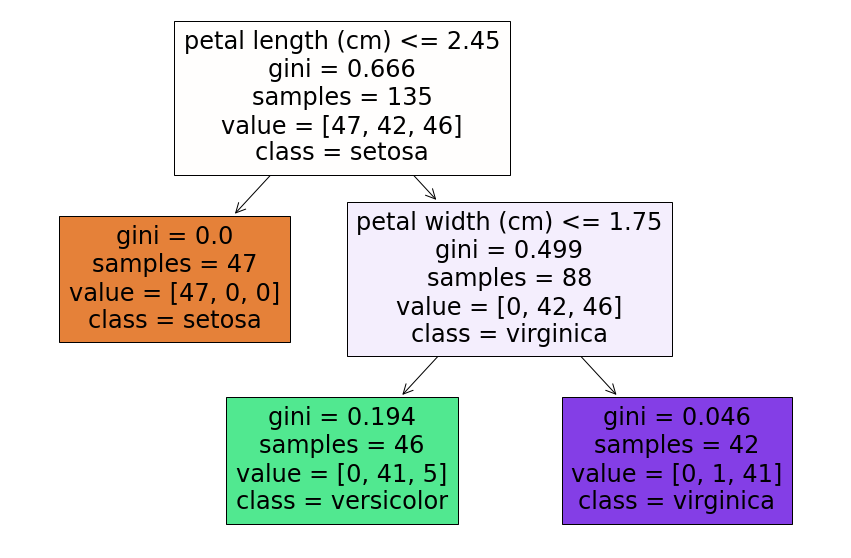

In [78]:
#可視化模型dec
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (15, 10))#設定圖框大小，置入決策圖
plot_tree(
    dec, 
    feature_names = iris["feature_names"], #將項目名稱放回框框中
    filled = True, #填入顏色
    class_names = iris["target_names"] #將答案丟進去
)

通過不同的決策將*gini吉尼係數*降至**最低** 

吉尼係數0.0=猜錯機率0%

$Gini = p_1(1-p_1)+p_2(1-p_2)+...+p_n(1-p_n)\\
=p_1-p_1^2+p_2-p_2^2+...+p_n-p_n^2\\
=(p_1+p_2+...+p_n)-(p_1^2+p_2^2+...+p_n^2)\\
=1-\Sigma^{n}_{i=1}{p_i^2}$

> 決策樹是**左T右F**

### 避免完美訓練 
又稱過擬合 **Overfitting** \\
將現實資料吃透，不斷訓練是沒有幫助的

&rarr; 前剪枝，設定條件

&rarr; 後剪枝

In [79]:
#測試模型dec準確度
from sklearn.metrics import accuracy_score
#predict為預測()變數的答案
accuracy_score(y_test, dec.predict(x_test))
#accuracy準確性

1.0

統計資料量需求：
**ML**：一千以上
**DL**：一萬以上

**資料量多寡 -> 問題難度** 欄位數目掛勾

\

- 資料處理Data.Frame &rarr;pandas
- 機械學習與深度學習sklearn：array&rarr;numpy

In [11]:
#分割出訓練資料與驗證資料，分割比例為9:1 or 8:2
from sklearn.model_selection import train_test_split

train_test_split(
    [1, 2, 3, 4],
    [5, 6, 7, 8,],
    [9, 10, 11, 12],
    test_size = 0.25
)

[[1, 4, 3], [2], [5, 8, 7], [6], [9, 12, 11], [10]]

In [35]:
#留意axis切欄=1切列=0
import pandas as pd
A = pd.DataFrame(
    [[1, 2],
    [3, 4]],
    columns = ["a", "b"],
    index = ["a", "b"]
)
B = A.drop("a",axis = 0)
C = A.drop("a",axis = 1)

print(A,"\n")
print(B,"\n")
print(C)

   a  b
a  1  2
b  3  4 

   a  b
b  3  4 

   b
a  2
b  4
